# Lab: NLP

## Import Libraries and Data

In [1]:
import re
import string
import numpy as np

import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
from nltk.corpus import twitter_samples
from nltk.tokenize import TweetTokenizer
import pandas as pd

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Activity: The above libraries are required for NLP. In your own words, explain the 'nltk' library. E.g.: What is the library about? what are the advantages of nltk in NLP etc.  

Write your answer here for above activity

nltk stands for Natural Language Toolkit. It is a Python library that helps work with text data. It has tools for breaking text into words, finding word roots, analyzing sentiment, and more. One big advantage is that it is easy to use, making it good for beginners in NLP. It also comes with many tools, like tokenizers and parsers, which help in processing text. Another useful feature is its built in datasets, such as Twitter samples and stopwords, so users don’t always need to find their own data. Plus, it supports multiple languages, making it useful for different projects. Because of these features, nltk is widely used in research, machine learning, and text analysis.

# Preparing the data

Activity: Explain the dataset. Run the following code then include explanation below about the dataset.

In [2]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

## Prepare Dataframe and Create Label Column

In [3]:
all_tweets = all_positive_tweets + all_negative_tweets
df = pd.DataFrame(all_tweets, columns=['Tweet'])
labels = [1] * 5000 + [0] * 5000
df['Label'] = labels
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,Tweet,Label
0,"I love you, how but you? @Taecyeon2pm8 did you...",0
1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...,1
2,"Your love, O Lord, is better than life. :) &lt...",1
3,@yasminyasir96 yeah but it will be better if w...,1
4,Ok good night I wish troye wasn't ugly and I m...,1
...,...,...
9995,My nose and forehead are peeling :(,0
9996,@LittleMix come to Belgium :(,0
9997,WHY MUST THE VIDEO STOP THO :(,0
9998,@jeremygutsche we like this amazing donut reci...,1


## Using `df.info` check if there are any null rows in data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   10000 non-null  object
 1   Label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


* Count the Labels column to see the distribution of the labels

<Axes: xlabel='Label'>

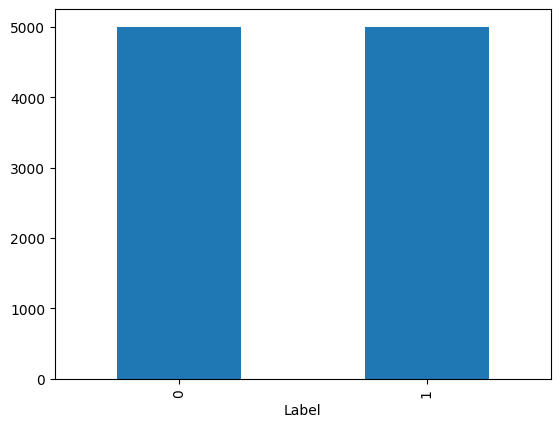

In [5]:
df['Label'].value_counts().plot(kind='bar')

The dataset consists of 10,000 tweets, equally divided into 5,000 positive tweets and 5,000 negative tweets. Each tweet is labeled as 1 for positive and 0 for negative to help with sentiment classification. Since the tweets are short text messages, they may include special characters, emojis, and informal language, making this dataset useful for natural language processing (NLP) tasks, particularly sentiment analysis. The balanced nature of the dataset will ensure that machine learning models trained on it do not favor one sentiment over the other.

# Activity One: Preprocessing the Textual Data

For the first activity you will be performing some text perprocessing using `re` and `nltk` library

#### 1. Create Function `clean_tweet` to Clean the Tweet and Apply to all rows in the Pandas Dataframe using `apply` and create new column `cleaned_tweet` and display the new dataframe.

In [6]:
def clean_tweet(tweet):

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)


    return tweet

* Removes stock tickers (e.g., $GE).
* Eliminates retweet mentions (RT).
* Strips URLs and hyperlinks.
* Removes hashtags (#) while keeping the word.

In [7]:
#create new column cleaned_tweet

#Clean the Tweet and Apply to all rows in the Pandas Dataframe using apply
df['cleaned_tweet'] = df['Tweet'].apply(clean_tweet)                            # Create new column 'cleaned_tweet' by applying the clean_tweet function to all rows

#display the new dataframe
df

# You also include comment to explain the code.





,Tweet,Label,cleaned_tweet
0,"I love you, how but you? @Taecyeon2pm8 did you...",0,"I love you, how but you? @Taecyeon2pm8 did you..."
1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...,1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...
2,"Your love, O Lord, is better than life. :) &lt...",1,"Your love, O Lord, is better than life. :) &lt;3"
3,@yasminyasir96 yeah but it will be better if w...,1,@yasminyasir96 yeah but it will be better if w...
4,Ok good night I wish troye wasn't ugly and I m...,1,Ok good night I wish troye wasn't ugly and I m...
...,...,...,...
9995,My nose and forehead are peeling :(,0,My nose and forehead are peeling :(
9996,@LittleMix come to Belgium :(,0,@LittleMix come to Belgium :(
9997,WHY MUST THE VIDEO STOP THO :(,0,WHY MUST THE VIDEO STOP THO :(
9998,@jeremygutsche we like this amazing donut reci...,1,@jeremygutsche we like this amazing donut reci...


#### 2. Create `tweet_tokenizer` function and you will be tokenizing the Cleaned Tweet from above using `TweetTokenizer` from `nltk` library and apply to all cleaned rows in the dataframe and display the dataframe.

* Read the documentation [here](https://www.nltk.org/api/nltk.tokenize.casual.html?highlight=tweet#nltk.tokenize.casual.TweetTokenizer) and then proceed so that you can understand properly.

In [8]:
def tweet_tokenizer(tweet):
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens


The code splits tweets into individual words, maintaining case insensitivity and reduces elongated words like "loooove" to "love"

In [9]:
#Tokenizing the Cleaned Tweet from above using TweetTokenizer from nltk library
#and apply to all cleaned rows in the dataframe
df['cleaned_tweet'] = df['cleaned_tweet'].apply(tweet_tokenizer)                # Apply tokenization to cleaned_tweet


#display the dataframe
df

,Tweet,Label,cleaned_tweet
0,"I love you, how but you? @Taecyeon2pm8 did you...",0,"[i, love, you, ,, how, but, you, ?, did, you, ..."
1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...,1,"[thanks, guys, :)]"
2,"Your love, O Lord, is better than life. :) &lt...",1,"[your, love, ,, o, lord, ,, is, better, than, ..."
3,@yasminyasir96 yeah but it will be better if w...,1,"[yeah, but, it, will, be, better, if, we, use,..."
4,Ok good night I wish troye wasn't ugly and I m...,1,"[ok, good, night, i, wish, troye, wasn't, ugly..."
...,...,...,...
9995,My nose and forehead are peeling :(,0,"[my, nose, and, forehead, are, peeling, :(]"
9996,@LittleMix come to Belgium :(,0,"[come, to, belgium, :(]"
9997,WHY MUST THE VIDEO STOP THO :(,0,"[why, must, the, video, stop, tho, :(]"
9998,@jeremygutsche we like this amazing donut reci...,1,"[we, like, this, amazing, donut, recipe, !, we..."


#### 3. create function `stopword_and_stemming`. In this function you will be removing `stopwords` and `stem` each word using `snowball stemmer` from `nltk` library

In [10]:
import string # to remove punctuations as well
from nltk.corpus import stopwords # Import stpwords from nltk
from nltk import SnowballStemmer # Import Stemmer from nltk

stopwords_english = stopwords.words('english')
stemmer = SnowballStemmer(language='english')

In [11]:
def stopword_and_stemming(tweet_tokens):
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return " ".join(tweets_clean) # Join tweets back to get a single string

* Removes common stopwords like "the," "is," and "and" using the NLTK stopword list.
* Applies stemming using SnowballStemmer, which reduces words to their root form like "running" to "run"

In [12]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(stopword_and_stemming)
df

,Tweet,Label,cleaned_tweet
0,"I love you, how but you? @Taecyeon2pm8 did you...",0,love feel emm think :(
1,@mayusushita @dildeewana_ @sonalp2591 @deepti_...,1,thank guy :)
2,"Your love, O Lord, is better than life. :) &lt...",1,love lord better life :) <3
3,@yasminyasir96 yeah but it will be better if w...,1,yeah better use offici account :) like ❤ ️
4,Ok good night I wish troye wasn't ugly and I m...,1,ok good night wish troy ugli met today :) ): o...
...,...,...,...
9995,My nose and forehead are peeling :(,0,nose forehead peel :(
9996,@LittleMix come to Belgium :(,0,come belgium :(
9997,WHY MUST THE VIDEO STOP THO :(,0,must video stop tho :(
9998,@jeremygutsche we like this amazing donut reci...,1,like amaz donut recip share foiegra lover :)


* Before Proceeding further into Analysis we have to split the data into `Train` and `Test`

In [13]:
from sklearn.model_selection import train_test_split                            # import train_test_split

# Split data into training and testing sets (70% - 30%)
X_train, X_valid, y_train, y_valid = train_test_split(df['cleaned_tweet'], df['Label'], test_size=0.3, random_state=42)

In [14]:
# Shapes
print("Training set size:", X_train.shape[0])
print("Testing/Validation set size:", X_valid.shape[0])

Training set size: 7000
Testing/Validation set size: 3000


# Activity Two: Bag of Words and TF-IDF

#### 1. Import `CountVectorizer` from `sklearn` libary and convert text to bag of words.

* Please go to documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to understand more about the arguments and what can be used for improving your feature engineering.
* ngram_rangetuple (min_n, max_n), default=(1, 1)
    * The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.
* strip_accents{‘ascii’, ‘unicode’}, default=None
    * Remove accents and perform other character normalization during the preprocessing step. ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. ‘unicode’ is a slightly slower method that works on any characters. None (default) does nothing.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer                     # Imports CountVectorizer, which converts text data into a numerical format by counting word occurrences.

count_vectorizer = CountVectorizer(ngram_range=(1, 2),                          # Initializes CountVectorizer to consider both single words (unigrams) and word pairs (bigrams) while removing accents for normalization.
                                   strip_accents='unicode')

In [16]:
X_train_cv = count_vectorizer.fit_transform(X_train)  # fit only on training data         # Fits CountVectorizer on training data and transforms X_train into a word frequency matrix.
X_valid_cv = count_vectorizer.transform(X_valid) # transform test/validation data         # Transforms validation data using the same vocabulary from X_train, ensuring consistency.

* Check the shapes of Training and Validation Data because most of the data will be sparse(mostly zeros) and check how both of the data have same number of columns which are features as well for training the model.

In [17]:
print("Train Shape -", X_train_cv.shape)
print("Validation Shape -", X_valid_cv.shape)

Train Shape - (7000, 33107)
Validation Shape - (3000, 33107)


This means that there are 7,000 tweets in training data and 33,107 unique features (words/bigrams).

* Display the vocabulary from `count_vectorizer` instance and check the unigram and bigram frequencies.

In [18]:
count_vectorizer.vocabulary_

{'case': 4787,
 'cat': 4809,
 'video': 30583,
 'mood': 18862,
 'swear': 27454,
 'case cat': 4791,
 'cat video': 4819,
 'video mood': 30596,
 'mood swear': 18870,
 'would': 32272,
 'anyway': 1896,
 'would anyway': 32278,
 'deactiv': 6794,
 'feel': 9204,
 'seek': 24715,
 'feel seek': 9261,
 'time': 28807,
 'control': 5891,
 'havent': 12542,
 'abl': 792,
 'miss': 18511,
 'time control': 28825,
 'control havent': 5893,
 'havent abl': 12543,
 'abl miss': 802,
 'good': 11370,
 'luck': 17347,
 'anoth': 1767,
 'potenti': 22346,
 'favourit': 9147,
 'water': 31219,
 'hole': 13141,
 'good luck': 11433,
 'luck anoth': 17349,
 'anoth potenti': 1786,
 'potenti favourit': 22348,
 'favourit water': 9157,
 'water hole': 31224,
 'late': 15798,
 'hey': 12859,
 'guy': 11977,
 'hey guy': 12879,
 'jordanian': 14768,
 'number': 20250,
 '00962778381': 16,
 '838': 693,
 'whatsapp': 31666,
 'jordanian number': 14769,
 'number 00962778381': 20251,
 '00962778381 838': 17,
 '838 whatsapp': 694,
 'let': 16058,
 'st

#### 2. Import `TfidfVectorizer` from `sklearn` libary and convert text to TFIDF Vectors.

* Please go to documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to understand more about the arguments and what can be used for improving your feature engineering.
* ngram_rangetuple (min_n, max_n), default=(1, 1)
    * The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.
* strip_accents{‘ascii’, ‘unicode’}, default=None
    * Remove accents and perform other character normalization during the preprocessing step. ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. ‘unicode’ is a slightly slower method that works on any characters. None (default) does nothing.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer                     # Imports TfidfVectorizer, which converts text into numerical data by calculating word importance (Term Frequency-Inverse Document Frequency).

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),                          # Initializes TfidfVectorizer to use both unigrams and bigrams while removing accents to standardize text.
                                   strip_accents='unicode')



In [20]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # fit only on training data    # Fits the vectorizer on X_train and transforms training tweets into numerical TF-IDF features.
X_valid_tfidf = tfidf_vectorizer.transform(X_valid) # transform test/validation data    # Transforms X_valid using the same TF-IDF model to ensure consistency in feature extraction.

* Check the shapes of Training and Validation Data because most of the data will be sparse(mostly zeros) and check how both of the data have same number of columns which are features as well for training the model.

In [21]:
print("Train Shape -", X_train_tfidf.shape)
print("Validation Shape -", X_valid_tfidf.shape)

Train Shape - (7000, 33107)
Validation Shape - (3000, 33107)


This means that there are 7,000 tweets in training data and 33,107 unique features.

#### Activity Three: Sentiment Classification Using Logistic Regression
* Also you can train any model of your choice once you have the features built from above two methods.

#### 1. Import `LogisticRegression` from `sklearn` library

In [22]:
from sklearn.linear_model import LogisticRegression

#### 2. Train Logistic Regresion using Count Vectorizer or Bag of Words features.
* Predict Validation Data
* Print Classification Report using `from sklearn.metrics import classification_report` library

In [23]:
# Train Logistic Regression Model using CountVectorizer
log_reg_cv = LogisticRegression()
log_reg_cv.fit(X_train_cv, y_train)

LogisticRegression()

In [24]:
y_valid_pred_cv = log_reg_cv.predict(X_valid_cv)  # Predict on validation data

In [25]:
from sklearn.metrics import classification_report  # For evaluating model performance

# Print classification report
print("Classification Report for CountVectorizer:")
print(classification_report(y_valid, y_valid_pred_cv))

Classification Report for CountVectorizer:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1461
           1       0.78      0.69      0.74      1539

    accuracy                           0.74      3000
   macro avg       0.75      0.75      0.74      3000
weighted avg       0.75      0.74      0.74      3000



Accuracy is 74%, meaning the model correctly classified 74% of all tweets in the validation set.
Overall, the model is doing a good job but could be improved, especially in recall for positive tweets. It means the model sometimes misses actual positive tweets.

#### 3. Train Logistic Regresion using TFIDF Vectorizer.
* Predict Validation Data
* Print Classification Report using `from sklearn.metrics import classification_report` library

In [26]:
# Train Logistic Regression Model using TF-IDF
log_reg_tfidf = LogisticRegression()
log_reg_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [27]:
y_valid_pred_tfidf = log_reg_tfidf.predict(X_valid_tfidf) # Predict on validation data

In [28]:
# Print classification report
print("Classification Report for TF-IDF:")
print(classification_report(y_valid, y_valid_pred_tfidf))

Classification Report for TF-IDF:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      1461
           1       0.79      0.68      0.73      1539

    accuracy                           0.74      3000
   macro avg       0.75      0.74      0.74      3000
weighted avg       0.75      0.74      0.74      3000



This TFIDF-based model has a slightly better recall for negative tweets but a lower recall for positive tweets compared to the CV model. The accuracy remains the same at 74%, suggesting that both methods perform similarly, but their strengths differ slightly. Improvements could be made by fine-tuning hyperparameters or experimenting with different preprocessing techniques.

#### 4.Inference on new data point from anyone of the model using countvectorizer or tfidf

In [29]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
my_tweet = clean_tweet(my_tweet)  # clean the text
my_tweet = tweet_tokenizer(my_tweet) # tokenize the text
my_tweet = stopword_and_stemming(my_tweet) # remove stopwords and stem each word
print(my_tweet)
my_tweet_vec = tfidf_vectorizer.transform([my_tweet])



y_hat = log_reg_tfidf.predict_proba(my_tweet_vec)
print(y_hat[0][0])
if y_hat[0][0] > 0.5:
    print('Negative sentiment')
else:
    print('Positive sentiment')

ridicul bright movi plot terribl sad end
0.8785351627398306
Negative sentiment


In [30]:
# Feel free to change the tweet below
my_tweet = 'I am good at what I am doing.'
my_tweet = clean_tweet(my_tweet)  # clean the text
my_tweet = tweet_tokenizer(my_tweet) # tokenize the text
my_tweet = stopword_and_stemming(my_tweet) # remove stopwords and stem each word
print(my_tweet)
my_tweet_vec = tfidf_vectorizer.transform([my_tweet])



y_hat = log_reg_tfidf.predict_proba(my_tweet_vec)
print(y_hat[0][1])
if y_hat[0][0] > 0.5:
    print('Negative sentiment')
else:
    print('Positive sentiment')

good
0.8436123703561299
Positive sentiment


Explanation of steps:

To classify tweets as positive or negative, we first preprocess the text by removing unwanted elements, tokenizing words, removing stopwords, and applying stemming. Since tweets often contain irrelevant symbols, links, and special characters, it is important to clean the text data before using it for model training. After cleaning, we perform tokenization, which involves breaking down each tweet into individual words or tokens. Next, we remove stopwords (common words like “the,” “is,” and “and”) since they do not carry significant meaning in sentiment classification. We then apply stemming, which reduces words to their root form like “running” becomes “run”, etc. This ensures that different variations of the same word are treated as a single entity, reducing complexity while preserving meaning. This ensures only meaningful words are used for sentiment analysis.

Next, the dataset is split into 70% training and 30% validation to train and evaluate the model. Since machine learning models require numerical input, we convert text into features using 2 methods. The CountVectorizer method converts words into a bag-of-words model, where each tweet is represented as a matrix of word frequencies. It also captures bigrams (word pairs) to preserve some contextual information. We apply CountVectorizer to the training data and then transform the validation data using the same vocabulary. TF-IDF Vectorizer assigns weights to words based on their importance. Words that appear frequently across all tweets receive lower weights, while unique words that appear in only a few tweets receive higher weights. This technique helps reduce the influence of common words that may not contribute to sentiment classification.

Both methods are applied to the dataset, allowing us to compare their effectiveness.

A Logistic Regression model is then trained using both vectorization techniques. The model learns the patterns in the training data and tries to predict whether a given tweet expresses positive or negative sentiment. After training, the model is tested on the validation data to measure its accuracy.The model is evaluated based on accuracy, precision, recall, and F1-score. The results show 74% accuracy, with TF-IDF better at recognizing negative tweets and CountVectorizer better at positive tweets.

This process transforms raw tweets into structured numerical data, allowing machine learning models to effectively perform sentiment analysis.